## Scrape Reddit data

In [74]:
import praw
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

reddit = praw.Reddit(client_id='W2fP53l-IPNjT-4eM75Mqg', client_secret='pzjn-1uckY-EZrbuuUzr1ZH14XLHnA', user_agent='Paper2 Scraping')

In [125]:
post_dict = {
            "title" : [],   #title of the post
            "comms_num": [],   #the number of comments on the post
            "created" : [],  #timestamp of the post
            "body" : [],         # the description of post
            "id" : [],      # unique id of the post
        }
comments_dict = {
            "comment_parent_id" : [],   # comment parent id
            "comment_body" : [],   # text in comment
        }

posts = reddit.subreddit('technews').search('TikTok AND ban', sort='top', limit=None)
for post in posts:
    submission = reddit.submission(id=post.id)
    
    post_dict["title"].append(submission.title)
    post_dict["comms_num"].append(submission.num_comments)
    post_dict["created"].append(submission.created)
    post_dict["body"].append(submission.selftext)
    post_dict["id"].append(submission.id)
            
    submission.comments.replace_more(limit = 1)
    for comment in submission.comments.list():
        comments_dict["comment_parent_id"].append(comment.parent_id)
        comments_dict["comment_body"].append(comment.body)
        
post_comments = pd.DataFrame(comments_dict)
post_comments.to_csv("subreddit.csv")

post_data = pd.DataFrame(post_dict)


## Calculate polarity scores and label sentiment for post titles

In [136]:
sid = SentimentIntensityAnalyzer()
sent_scores = []
for t in post_data['title']:
    sent_scores.append(sid.polarity_scores(t)['compound'])

post_data['Sentiment scores'] = sent_scores
post_data.head()

,title,comms_num,created,body,id,Sentiment scores,Sentiment label
0,Nationwide ban on TikTok inches closer to reality,4891,1.675002e+09,,10o8tbi,-0.5574,Negative
1,TikTok bans politicians and political parties ...,173,1.663788e+09,,xke5nz,0.4019,Positive
2,TikTok admits to spying on U.S. users as effor...,370,1.671960e+09,,zuun13,-0.3400,Negative
3,TikTok Bans Influencers From Promoting Cryptoc...,469,1.626674e+09,,on80wh,0.6124,Positive
4,Texas Gov. Greg Abbott bans TikTok on state de...,273,1.670460e+09,,zfjng9,0.0000,Neutral


In [137]:
def get_label(score):
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

In [138]:
post_data['Sentiment label'] = post_data['Sentiment scores'].apply(get_label)
post_data.head()

,title,comms_num,created,body,id,Sentiment scores,Sentiment label
0,Nationwide ban on TikTok inches closer to reality,4891,1.675002e+09,,10o8tbi,-0.5574,Negative
1,TikTok bans politicians and political parties ...,173,1.663788e+09,,xke5nz,0.4019,Positive
2,TikTok admits to spying on U.S. users as effor...,370,1.671960e+09,,zuun13,-0.3400,Negative
3,TikTok Bans Influencers From Promoting Cryptoc...,469,1.626674e+09,,on80wh,0.6124,Positive
4,Texas Gov. Greg Abbott bans TikTok on state de...,273,1.670460e+09,,zfjng9,0.0000,Neutral


In [ ]:
post_data.to_csv("subreddit_posts.csv")

## Calculate polarity scores and label sentiment for comments

In [140]:
sent_scores = []
for c in post_comments['comment_body']:
    sent_scores.append(sid.polarity_scores(c)['compound'])

post_comments['Sentiment scores'] = sent_scores

post_comments['Sentiment label'] = post_comments['Sentiment scores'].apply(get_label)

post_comments.head()

,comment_parent_id,comment_body,Sentiment scores,Sentiment label
0,t3_10o8tbi,We should have never gotten rid of Vine!,0.0000,Neutral
1,t3_10o8tbi,Wouldn’t be a problem if the US would make pro...,-0.6893,Negative
2,t3_10o8tbi,"I mean, the second TikTok goes down, a new Ame...",0.9231,Positive
3,t3_10o8tbi,"Well, there goes 50% of Reddit's current content.",0.2732,Positive
4,t3_10o8tbi,"Theyll do all this, but dont have any issues s...",0.7579,Positive


In [141]:
count = post_data['Sentiment label'].value_counts()
count

Negative    14
Positive     5
Neutral      4
Name: Sentiment label, dtype: int64

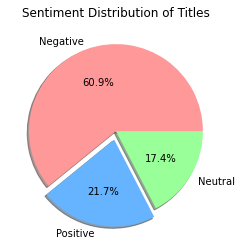

In [142]:
plt.pie(count, labels=count.index, autopct = '%1.1f%%', explode=(0, 0.1, 0), shadow=True, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Sentiment Distribution of Titles')
plt.show()

In [143]:
count_com = post_comments['Sentiment label'].value_counts()
count_com

Positive    1020
Negative     940
Neutral      691
Name: Sentiment label, dtype: int64

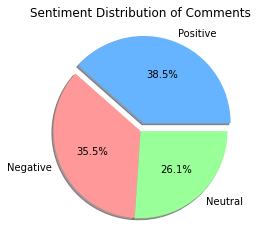

In [68]:
plt.pie(count_com, labels=count_com.index, autopct='%1.1f%%', explode=(0.1, 0, 0), shadow=True, colors=['#66b3ff','#ff9999','#99ff99'])
plt.title('Sentiment Distribution of Comments')
plt.show()

In [156]:
post_data.head()

,title,comms_num,created,body,id,Sentiment scores,Sentiment label
0,Nationwide ban on TikTok inches closer to reality,4891,1.675002e+09,,10o8tbi,-0.5574,Negative
1,TikTok bans politicians and political parties ...,173,1.663788e+09,,xke5nz,0.4019,Positive
2,TikTok admits to spying on U.S. users as effor...,370,1.671960e+09,,zuun13,-0.3400,Negative
3,TikTok Bans Influencers From Promoting Cryptoc...,469,1.626674e+09,,on80wh,0.6124,Positive
4,Texas Gov. Greg Abbott bans TikTok on state de...,273,1.670460e+09,,zfjng9,0.0000,Neutral


In [157]:
top_posts = post_data.sort_values(by='comms_num', ascending=False)[:5]
top_posts

,title,comms_num,created,body,id,Sentiment scores,Sentiment label
0,Nationwide ban on TikTok inches closer to reality,4891,1.675002e+09,,10o8tbi,-0.5574,Negative
3,TikTok Bans Influencers From Promoting Cryptoc...,469,1.626674e+09,,on80wh,0.6124,Positive
2,TikTok admits to spying on U.S. users as effor...,370,1.671960e+09,,zuun13,-0.3400,Negative
4,Texas Gov. Greg Abbott bans TikTok on state de...,273,1.670460e+09,,zfjng9,0.0000,Neutral
5,TikTok Sues Trump Administration Over App Ban,231,1.598349e+09,,ig948o,-0.5574,Negative


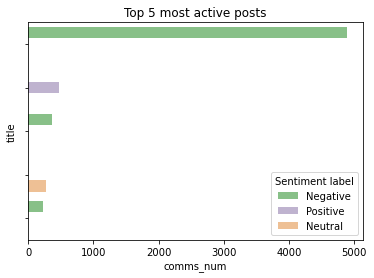

In [158]:
ax = sns.barplot(y = top_posts['title'], x = top_posts['comms_num'], hue=top_posts['Sentiment label'], orient='h', palette='Accent')
ax.set(yticklabels=[])
plt.title('Top 5 most active posts')
plt.show()

## Word Cloud

In [159]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, RegexpTokenizer
from itertools import chain

def custom_token(text):
    text = text.replace('-','').lower()
    tokens = RegexpTokenizer(r'\w+').tokenize(text)
    clean_tokens = [token for token in tokens if token not in stopwords.words('english') and token.isalpha()]
    return clean_tokens

pos_comments = post_comments[post_comments['Sentiment label'] == 'Positive']
neg_comments = post_comments[post_comments['Sentiment label'] == 'Negative']

pos_tokens = pos_comments['comment_body'].apply(custom_token)
neg_tokens = neg_comments['comment_body'].apply(custom_token)


In [160]:
pos_cloud = list(chain.from_iterable(pos_tokens))
neg_cloud = list(chain.from_iterable(neg_tokens))

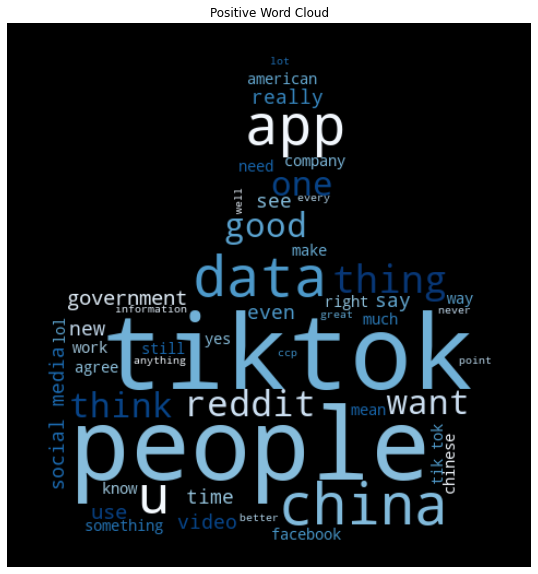

In [161]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
import numpy as np

from PIL import Image

pos_cloud = " ".join(pos_cloud)

mask = np.array(Image.open('like-emoji-thumbs-up-light-skin-tone-11583239369saayvhhqzn.png'))

word_cloud= WordCloud(background_color="black", colormap='Blues', random_state=1,max_words=50,mask=mask)
word_cloud.generate(pos_cloud)
plt.figure(figsize=[10,10])
plt.imshow(word_cloud,interpolation="bilinear")
plt.axis('off')
plt.title('Positive Word Cloud')

plt.show()

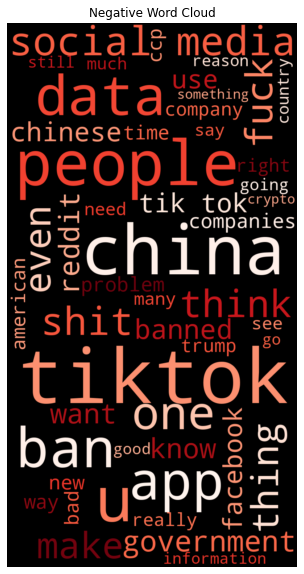

In [117]:
neg_cloud = " ".join(neg_cloud)

word_cloud= WordCloud(background_color="black", colormap='Reds', random_state=1,max_words=50,width =800, height = 1500)

word_cloud.generate(neg_cloud)
plt.figure(figsize=[10,10])
plt.imshow(word_cloud,interpolation="bilinear")
plt.axis('off')
plt.title('Negative Word Cloud')

plt.show()